In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("loan_approval_data.csv")
df1=df

In [3]:
df1.isnull().sum()

Applicant_ID          50
Applicant_Income      50
Coapplicant_Income    50
Employment_Status     50
Age                   50
Marital_Status        50
Dependents            50
Credit_Score          50
Existing_Loans        50
DTI_Ratio             50
Savings               50
Collateral_Value      50
Loan_Amount           50
Loan_Term             50
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64

Handeling missing Values


In [4]:
categorical_cols=df.select_dtypes(include=["object"]).columns
numerical_cols=df.select_dtypes(include=["float64"]).columns

In [5]:
numerical_cols

Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income', 'Age',
       'Dependents', 'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term'],
      dtype='object')

In [6]:
from sklearn.impute import SimpleImputer

num_imp=SimpleImputer(strategy="mean")
df[numerical_cols]=num_imp.fit_transform(df[numerical_cols])


In [7]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [8]:
cat_imp=SimpleImputer(strategy="most_frequent")
df[categorical_cols]=cat_imp.fit_transform(df[categorical_cols])



In [9]:
df.isnull().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

EDA-- exploratory data analysis 


Text(0.5, 1.0, 'Is loan apptoved or not ')

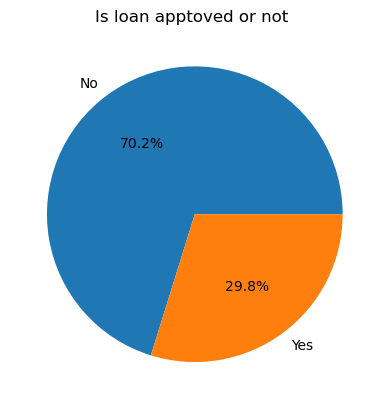

In [67]:
#how balance our classes are 
classes_count=df["Loan_Approved"].value_counts()
plt.pie(classes_count,labels=["No","Yes"],autopct="%1.1f%%")
plt.title("Is loan apptoved or not ")

[Text(0, 0, '621'), Text(0, 0, '379')]

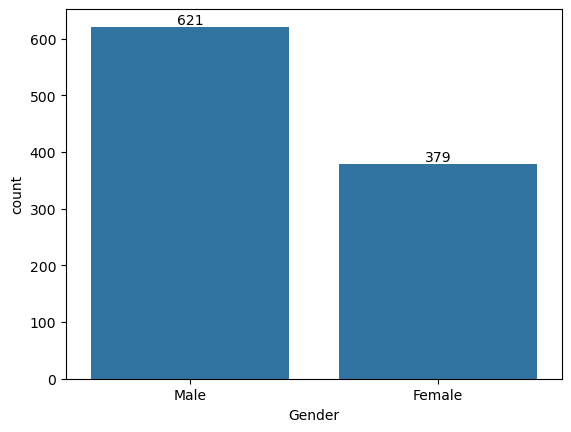

In [11]:
#analyze categories

gender_count=df["Gender"].value_counts()
ax=sns.barplot(gender_count)
ax.bar_label(ax.containers[0])
# plt.pie(gender_count,labels=["Male","Female"],autopct="%1.1f%%")


[Text(0, 0, '722'), Text(0, 0, '278')]

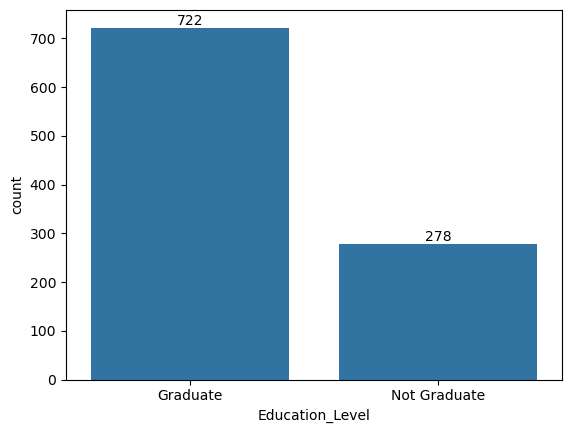

In [12]:
edu_count=df["Education_Level"].value_counts()
ax=sns.barplot(edu_count)
ax.bar_label(ax.containers[0])

<Axes: xlabel='Applicant_Income', ylabel='Count'>

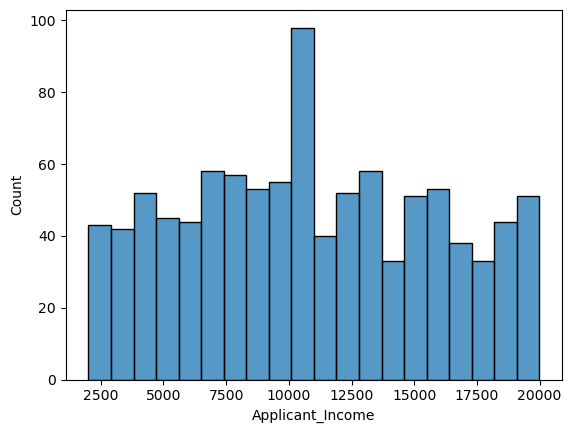

In [13]:
sns.histplot(
    data=df,
    x="Applicant_Income",
    bins=20
    
)

<Axes: xlabel='Coapplicant_Income', ylabel='Count'>

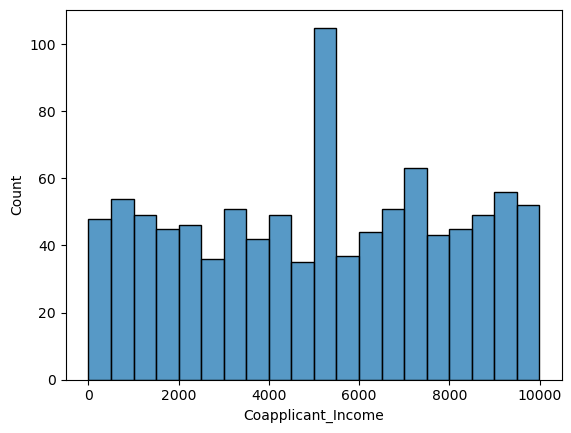

In [14]:
sns.histplot(
    data=df,
    x="Coapplicant_Income",
    bins=20
)

<Axes: xlabel='Loan_Approved', ylabel='Applicant_Income'>

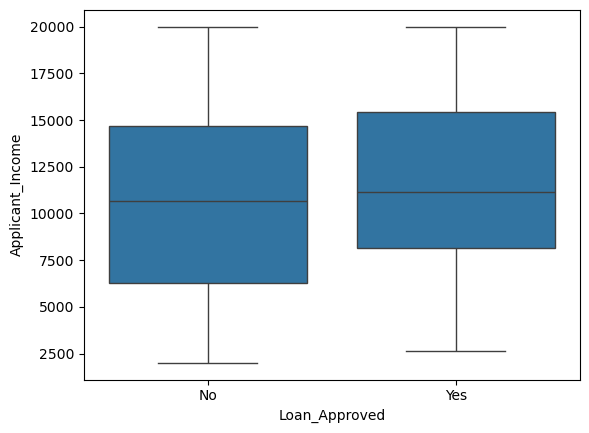

In [15]:
##we can use boxplot for outlier 
sns.boxplot(
    data=df,
    x="Loan_Approved",
    y="Applicant_Income"
    
)

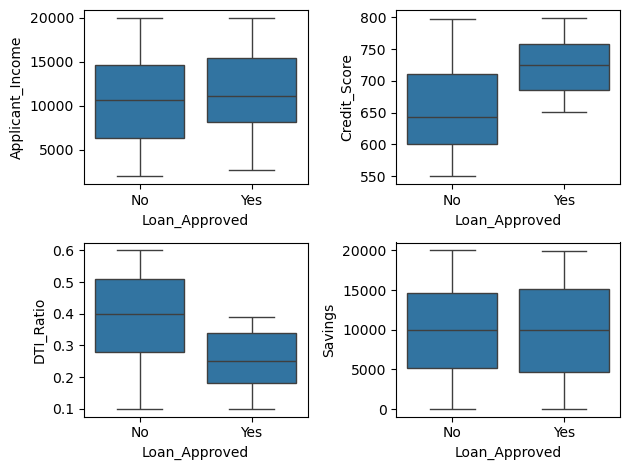

In [16]:
fig,axis=plt.subplots(2,2)
sns.boxplot(ax=axis[0,0],data=df,x="Loan_Approved",y="Applicant_Income")
sns.boxplot(ax=axis[0,1],data=df,x="Loan_Approved",y="Credit_Score")
sns.boxplot(ax=axis[1,0],data=df,x="Loan_Approved",y="DTI_Ratio")
sns.boxplot(ax=axis[1,1],data=df,x="Loan_Approved",y="Savings")

plt.tight_layout()

<Axes: xlabel='Credit_Score', ylabel='Count'>

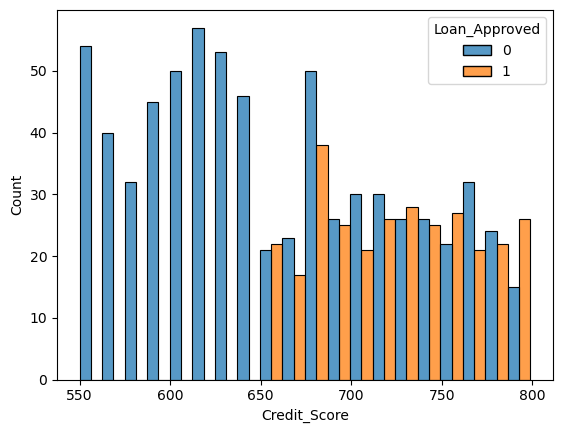

In [69]:
sns.histplot(
    data=df,
    x="Credit_Score",
    hue="Loan_Approved",
    bins=20,
    multiple="dodge"
)

Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le= LabelEncoder()
df["Education_Level"]=le.fit_transform(df["Education_Level"])
df["Loan_Approved"]=le.fit_transform(df["Loan_Approved"])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        1000 non-null   float64
 1   Applicant_Income    1000 non-null   float64
 2   Coapplicant_Income  1000 non-null   float64
 3   Employment_Status   1000 non-null   object 
 4   Age                 1000 non-null   float64
 5   Marital_Status      1000 non-null   object 
 6   Dependents          1000 non-null   float64
 7   Credit_Score        1000 non-null   float64
 8   Existing_Loans      1000 non-null   float64
 9   DTI_Ratio           1000 non-null   float64
 10  Savings             1000 non-null   float64
 11  Collateral_Value    1000 non-null   float64
 12  Loan_Amount         1000 non-null   float64
 13  Loan_Term           1000 non-null   float64
 14  Loan_Purpose        1000 non-null   object 
 15  Property_Area       1000 non-null   object 
 16  Educati

In [20]:
cols=["Employment_Status","Marital_Status","Loan_Purpose","Property_Area","Gender","Employer_Category"]
ohe=OneHotEncoder( drop="first",sparse_output=False,handle_unknown="ignore")
encoded=ohe.fit_transform(df[cols])
encoded_df=pd.DataFrame(encoded,columns=ohe.get_feature_names_out(cols),index=df.index)

In [21]:
df=pd.concat([df.drop(columns=cols),encoded_df],axis=1)

In [22]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,1.0,17795.0,1387.0,51.0,0.0,637.0,4.0,0.53,19403.0,45638.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2.0,2860.0,2679.0,46.0,3.0,621.0,2.0,0.30,2580.0,49272.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3.0,7390.0,2106.0,25.0,2.0,674.0,4.0,0.20,13844.0,6908.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,4.0,13964.0,8173.0,40.0,2.0,579.0,3.0,0.31,9553.0,10844.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5.0,13284.0,4223.0,31.0,2.0,721.0,1.0,0.29,9386.0,37629.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


<Axes: >

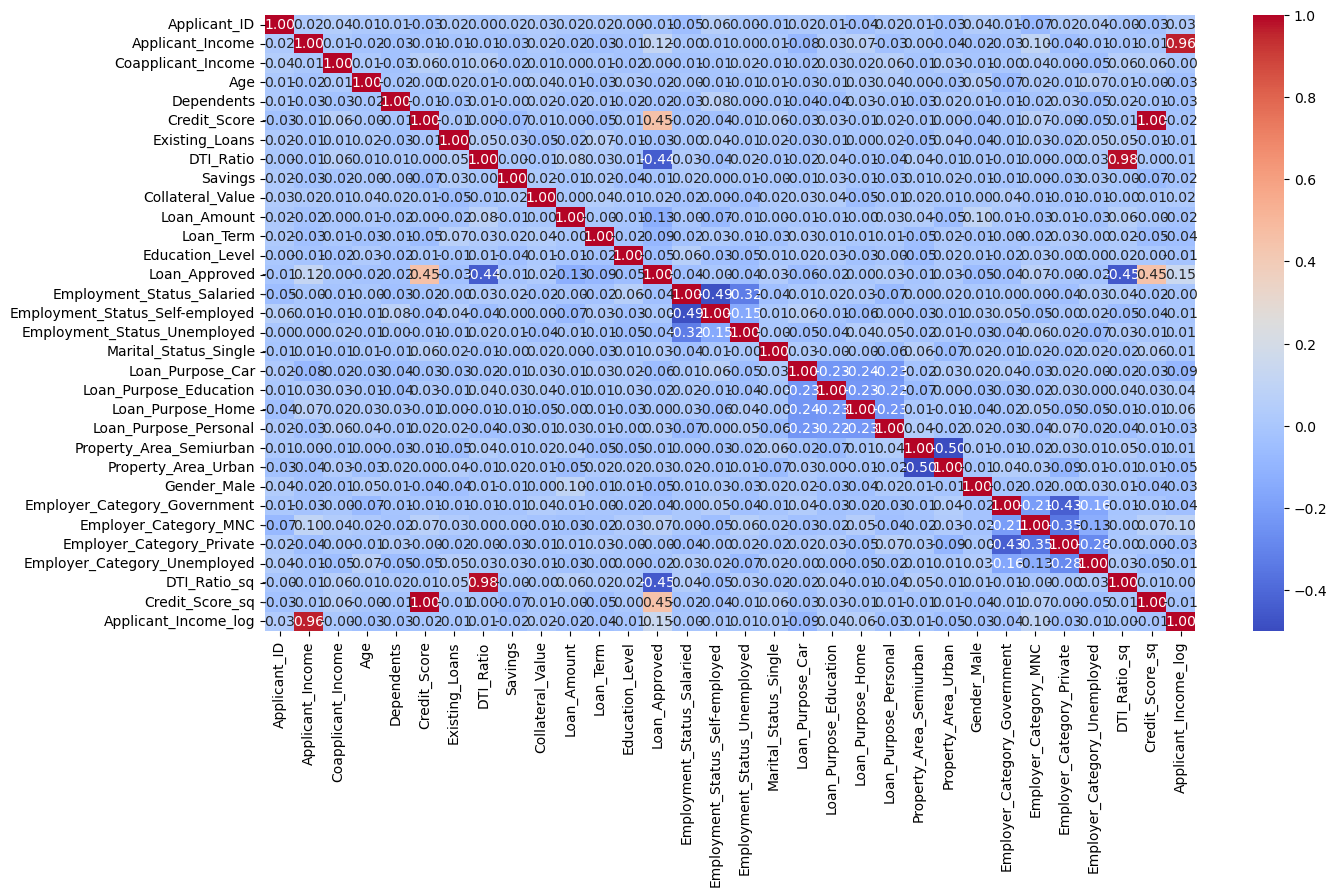

In [87]:
num_cols=df.select_dtypes(include="number")
corr_matrix=num_cols.corr()
plt.figure(figsize=(15,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

In [ ]:
num_cols.corr()["Loan_Approved"].sort_values(ascending=False)

Train-Test_split +Feature Scaling


In [31]:
x=df.drop("Loan_Approved",axis=1)
y=df["Loan_Approved"]

In [32]:
x.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,1.0,17795.0,1387.0,51.0,0.0,637.0,4.0,0.53,19403.0,45638.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2.0,2860.0,2679.0,46.0,3.0,621.0,2.0,0.30,2580.0,49272.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3.0,7390.0,2106.0,25.0,2.0,674.0,4.0,0.20,13844.0,6908.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,4.0,13964.0,8173.0,40.0,2.0,579.0,3.0,0.31,9553.0,10844.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5.0,13284.0,4223.0,31.0,2.0,721.0,1.0,0.29,9386.0,37629.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=42
)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

Train and Evaluatee Models

In [46]:
#logistic-regression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
log_model=LogisticRegression()
log_model.fit(x_train_scaled,y_train)
y_pred=log_model.predict(x_test_scaled)

print("precissio :",precision_score(y_test,y_pred))
print("recall :",recall_score(y_test,y_pred))
print("cm :",confusion_matrix(y_test,y_pred))
print("accuracy:",accuracy_score(y_test,y_pred))

precissio : 0.7868852459016393
recall : 0.7868852459016393
cm : [[126  13]
 [ 13  48]]
accuracy: 0.87


In [60]:
#knn
from sklearn.neighbors import KNeighborsClassifier
k_model=KNeighborsClassifier(n_neighbors=7)
k_model.fit(x_train_scaled,y_train)

y_pred=k_model.predict(x_test_scaled)

#evaluation 
print("precissio :",precision_score(y_test,y_pred))
print("recall :",recall_score(y_test,y_pred))
print("cm :",confusion_matrix(y_test,y_pred))
print("accuracy:",accuracy_score(y_test,y_pred))

precissio : 0.6428571428571429
recall : 0.4426229508196721
cm : [[124  15]
 [ 34  27]]
accuracy: 0.755


In [65]:
#Navie baye 
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(x_train_scaled,y_train)

y_pred=nb_model.predict(x_test_scaled)
#evalutions
print("precissio :",precision_score(y_test,y_pred))
print("recall :",recall_score(y_test,y_pred))
print("cm :",confusion_matrix(y_test,y_pred))
print("accuracy:",accuracy_score(y_test,y_pred))

precissio : 0.8035714285714286
recall : 0.7377049180327869
cm : [[128  11]
 [ 16  45]]
accuracy: 0.865


feature engi

In [75]:
df["DTI_Ratio_sq"]=df["DTI_Ratio"]**2
df["Credit_Score_sq"]=df["Credit_Score"]**2

df["Applicant_Income_log"]=np.log1p(df["Applicant_Income"])

x=df.drop(columns=["Loan_Approved","Credit_Score","DTI_Ratio","Applicant_Income"])
y=df["Loan_Approved"]

x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=42
)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [76]:
x_train.head()

,Applicant_ID,Coapplicant_Income,Age,Dependents,Existing_Loans,Savings,Collateral_Value,Loan_Amount,Loan_Term,Education_Level,...,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed,DTI_Ratio_sq,Credit_Score_sq,Applicant_Income_log
29,30.0,8041.0,31.000000,0.0,0.000000,11906.0,8150.000000,29287.000000,12.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0121,363609.000000,8.681181
535,536.0,529.0,50.000000,0.0,0.000000,5369.0,5430.000000,14786.000000,72.0,1,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0441,376996.000000,8.472196
695,696.0,8927.0,36.000000,0.0,4.000000,3186.0,24802.792632,20522.825263,48.0,1,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0484,341056.000000,9.292249
557,558.0,2113.0,39.971579,1.0,4.000000,11882.0,48542.000000,13312.000000,24.0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.1156,527076.000000,7.776954
836,837.0,5249.0,42.000000,1.0,1.950526,17669.0,24802.792632,13906.000000,84.0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0324,457021.542187,8.561975


In [77]:
#logistic regression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
log_model=LogisticRegression()
log_model.fit(x_train_scaled,y_train)
y_pred=log_model.predict(x_test_scaled)

print("precissio :",precision_score(y_test,y_pred))
print("recall :",recall_score(y_test,y_pred))
print("cm :",confusion_matrix(y_test,y_pred))
print("accuracy:",accuracy_score(y_test,y_pred))

precissio : 0.7777777777777778
recall : 0.8032786885245902
cm : [[125  14]
 [ 12  49]]
accuracy: 0.87


In [78]:
#knn
from sklearn.neighbors import KNeighborsClassifier
k_model=KNeighborsClassifier(n_neighbors=7)
k_model.fit(x_train_scaled,y_train)

y_pred=k_model.predict(x_test_scaled)

#evaluation 
print("precissio :",precision_score(y_test,y_pred))
print("recall :",recall_score(y_test,y_pred))
print("cm :",confusion_matrix(y_test,y_pred))
print("accuracy:",accuracy_score(y_test,y_pred))

precissio : 0.6904761904761905
recall : 0.47540983606557374
cm : [[126  13]
 [ 32  29]]
accuracy: 0.775


In [79]:
#Navie baye 
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(x_train_scaled,y_train)

y_pred=nb_model.predict(x_test_scaled)
#evalutions
print("precissio :",precision_score(y_test,y_pred))
print("recall :",recall_score(y_test,y_pred))
print("cm :",confusion_matrix(y_test,y_pred))
print("accuracy:",accuracy_score(y_test,y_pred))

precissio : 0.7962962962962963
recall : 0.7049180327868853
cm : [[128  11]
 [ 18  43]]
accuracy: 0.855
